# Øving 2, TMA4320

* **Veiledning:** Torsdag 16. januar, 0815-1000 i H3
* **Innleveringsfrist:** Torsdag 23. januar, kl 1400
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på Blackboardskjema for de tre kontrollspørsmålene i øvingen


Vi skal i denne oppgaven bruke fikspunktiterasjon og spesifikt Newtons metode, først for skalar ligning og deretter for et system av ligninger.

**Oppgave 1** Fikspunktiterasjon for skalare ligninger.
Vi ser nå på polynomet

$$
     p(x) = x^5-3x+1
$$
som har 3 reelle nullpunkter, $x_1\approx -1.3887919844072541828$, $x_2\approx 0.33473414194335268708$
og $x_3\approx 1.2146480426984618040$. Vi bruker to omforminger av ligningen til fikspunktform
1. $x=g(x)$ med $g(x)=\frac13(x^5+1)$ ("tilfeldig")
2. $x=g(x)$ med $g(x)=x-\frac{x^5-3x+1}{5x^4-3}$ (Newton)

I fikspunktiterasjonen vil vi ha en startverdi $x^{(0)}$ og en toleranse $\mathrm{tol}$. Stoppkriteriet vi bruker er

$$
    |x^{(k)}-x^{(k-1)}| < \mathrm{tol}
$$

<div class="alert alert-block alert-success">

Lag funksjoner *fiksit* og *newton* for hvert av tilfellene tar som input startverdien $x^{(0)}$ og toleransen tol, og returnerer approksimasjon til roten samt antall iterasjoner benyttet. Funksjonene skrives spesifikt for dette eksemplet. Sørg for at funksjonen avslutter dersom metoden ikke har konvergert etter *maxiter* iterasjoner.
Test ut med $x^{(0)}=0$ og $\mathrm{tol}=10^{-10}$.
</div>

**Kontrollspørsmål 1** Hvor mange iterasjoner bruker de to funksjonene med denne startverdien/toleransen?

In [39]:
import numpy as np

def fiksit(x0,tol):
    assert tol>0
    maxiter=100
    iter=0
    est=2*tol
    xp=x0
    while est>tol and iter<maxiter:
        iter=iter+1
        x=1/3.0*(xp**5+1)
        est=abs(x-xp)
        xp=x
    return x,iter

def newton(x0,tol):
    assert tol>0
    maxiter=100
    iter=0
    est=2*tol
    xp=x0
    while est>tol and iter<maxiter:
        iter=iter+1
        x=(4.*xp**5.-1.)/(5.*xp**4.-3.)
        est=abs(x-xp)
        xp=x
    return x,iter

x0=0
tol=1e-10
r1,iter1=fiksit(x0,tol)
r2,iter2=newton(x0,tol)
print(r1,iter1,r2,iter2)

0.33473414194323614 7 0.3347341419433527 4


**Oppgave 2.** Vi skal nå se på bruk av automatisk derivasjon for Newtons metode. Automatisk derivasjon er en teknikk som ble oppfunnet for ikke så veldig mange år siden. Det er en algoritme som kan ta en vilkårlig funksjon skrevet f.eks. i Python, og genererer fra denne automatisk den deriverte av funksjonen. Det er ikke det samme som symbolsk derivasjon for resultatet foreligger ikke som et symbolsk uttrykk. I dette kurset skal vi kun bruke ferdig implementert automatisk derivasjon. Det fins en pakke for dette formålet i Python som heter *autograd*. Vi kan ikke benytte 'vanlig numpy' når vi gjør autoderivasjon, men bruker en variant autograd.numpy, det er derfor denne vi nå må importere. I vinduet nedenfor demonstrerer vi bruken og har valgt å hente inn funksjonen *value_and_grad* fra *autograd*. Den kan brukes til å finne et tuple bestående av funksjonsverdi og derivert for gitte verdier av argumentet til funksjonen. Mye blir nok klart hvis du leser følgende eksempel

In [40]:
import autograd.numpy as np   
from autograd import value_and_grad 

def g(x):
    return np.sin(x)

Dg = value_and_grad(g)
G=Dg(np.pi/6.)
print(G[0])
print(G[1])

0.49999999999999994
0.8660254037844387


Med $g(x)=\sin x$ får vi laget funksjonen Dg som returnerer tuplet $(g(x),g'(x))=(\sin x, \cos x)$.
Som du vet er $\sin\frac{\pi}{6}=\frac12$ mens $\cos\frac{\pi}{6}=\frac12\sqrt{3}\approx 0.866$.

Når man bruker *autograd* er datatypen til input viktig. Du bør for eksempel alltid definere tall som skal være flyttall med desimalpunktum, f.eks. skriv ikke *x0=1*, men *x0=1.0*. I motsatt fall kan du få kryptiske feilmeldinger.

<div class="alert alert-block alert-success">

**(a)** Lag en funksjon *gNewton* som tar tre inputargumenter: funksjonen $f(x)$ som en skal finne nullpunkter til, startverdien $x^{(0)}$, og toleransen tol. Returner approksimert rot og antall iterasjoner. </div>

<div class="alert alert-block alert-success">

**(b)** Test *gNewton* på funksjonen

$$
 f(x) = \frac13\sqrt{1+\sin(\tanh x)}+\cos x
$$
med startverdi $x0=\{-2.0,2.0,4.0,8.0\}$, $\mathrm{tol}=10^{-10}$ og skriv ut rotapproksimasjon og antall iterasjoner i hvert tilfelle. 

</div>

**Kontrollspørsmål 2** Hvor mange distinkte (forskjellige) røtter fikk du konvergens mot totalt med disse 4 startverdiene?


In [41]:
# Fyll inn koden for b-spørsmålet her
import autograd.numpy as np
from autograd import value_and_grad

def f(x):
    return 1/3.*np.sqrt(1+np.sin(np.tanh(x)))+np.cos(x)

def gNewton(f, x0, tol):
    assert tol>0
    maxiter=100
    iter=0
    xp=x0
    est= float('inf')
    Df = value_and_grad(f)
    while est>tol and iter<maxiter:
        iter=iter+1
        T=Df(xp)
        x=xp-T[0]/T[1]
        est=np.abs(x-xp)
        xp=x
    return x, iter

x0set=[-2.,2.,4.,8.]
tol=1.0e-10
for x0 in x0set:
    x, iter = gNewton(f, x0, tol)
    print(x,iter)

-1.7180861141125476 4
2.0376244457683277 4
4.24303676441417 5
8.323364548870096 5


**Oppgave 3** Newtons metode for systemer av ligninger

Nå skal vi gå litt videre i forhold til forelesningsmaterialet, og se på systemer av ligninger.
Newton's metode kan fremdeles defineres, men må generaliseres. Et $n$-dimensjonalt system av ligninger kan skrives
$$
\begin{array}{lcr}
f_0(x_0,\ldots,x_{n-1})&=&0\\
f_1(x_0,\ldots,x_{n-1})&=&0\\
&\vdots&\\
f_{n-1}(x_0,\ldots,x_{n-1})&=&0
\end{array}
$$

dvs $n$ ligninger $f_0,\ldots,f_{n-1}$ for $n$ ukjente $x_0,\ldots,x_{n-1}$. 
I kortspråk skriver vi dette kun som $\mathbf{f}(\mathbf{x})=0$.

En sentral størrelse her er den såkalte
Jacobi-matrisen. Hvis vi partiellderiverer $n$ funksjoner, hver med hensyn på $n$ variable, så blir det totalt
$n^2$ funksjoner, dette er elementene i Jacobimatrisen

$$
D\mathbf{f} = \left[
\begin{array}{cccc}
\frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \cdots & \frac{\partial f_0}{\partial x_{n-1}} \\
\frac{\partial f_1}{\partial x_0} & \frac{\partial f_1}{\partial x_1} &\cdots & \frac{\partial f_1}{\partial x_{n-1}}\\
\vdots                            & \vdots                            &        &    \vdots   \\
\frac{\partial f_{n-1}}{\partial x_0} & \frac{\partial f_{n-1}}{\partial x_1} &\cdots & \frac{\partial f_{n-1}}{\partial x_{n-1}}
\end{array}
\right]
$$

Generaliseringen av Newton's metode er nå rett og slett: Gitt $\mathbf{x}^{(0)}\in\mathbb{R}^n$ la

$$
    \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \left[D\mathbf{f}(\mathbf{x}^{(k)})\right]^{-1}\cdot \mathbf{f}(\mathbf{x}^{(k)})
$$

For å implementere denne kan vi definere $\mathbf{f}$ som en funksjon som tar et numpy-array som input og returnerer et numpy-array. Så fins det en funksjon i pakken *autograd* som heter *jacobian* og som beregner Jacobimatrisen. Vi illustrerer hvordan vi bruker *jacobian* på funksjonen 

$$
\mathbf{f}(x_0,x_1) = \left[\begin{array}{c}x_0^2+x_1^2\\ x_0 x_1\end{array}\right]\quad\Rightarrow\quad 
Df=\left[
\begin{array}{cc}
2x_0 & 2 x_1 \\ x_1 & x_0
\end{array}
\right]
$$

In [3]:
import autograd.numpy as np
from autograd import jacobian

def f(x):
    return np.array([x[0]**2+x[1]**2,x[0]*x[1]])

Df = jacobian(f)
x=np.array([1.0,2.0])
print(Df(x))


[[2. 4.]
 [2. 1.]]


Merk at kallet til *jacobian* gjøres bare én gang når *f* er definert. Etterpå kan *Df* brukes flere ganger med ulike inputargumenter.

Nå litt om hvordan man implementerer Newton's metode. Inversmatrisen som figurere i iterasjonen gjør vi her enkelt ved å kalle en ferdigrutine i *numpy.linalg*, se nedenfor. Hvis vi definerer $\delta=D\mathbf{f}(\mathbf{x}^{(k)})^{-1}\cdot\mathbf{f}(\mathbf{x}^{(k)})$ kan vi skrive en Newtoniterasjon som
1. Løs $D\mathbf{f}(\mathbf{x}^{(k)})\delta = -\mathbf{f}(\mathbf{x}^{(k)})$ m.h.p. $\delta$
2. Sett $\mathbf{x}^{(k+1)}=\mathbf{x}^{(k)}+\delta$

I *numpy* fins en delpakke som heter *numpy.linalg* og i denne fins en funksjon som heter *solve*. Derfor kan vi løse ligningssystemer som i 1. ved

In [9]:
import numpy as np
import numpy.linalg as la

A=np.array([[2,1],[3,1]])
b=np.array([1,1])
y=la.solve(A,b)
print(y,la.norm(y))

[0. 1.] 1.0


Vi har også tatt med *la.norm* som beregner lengden til en vektor. Det trenger vi å gjøre når vi skal lage stoppkriterium i Newtoniterasjonen, det er naturlig å kreve at $\mathrm{la.norm(delta)}<\mathrm{tol}$.

<div class="alert alert-block alert-success">

**(a)** Skriv en funksjon sNewton som tar tre inputargumenter: funksjonen $\mathbf{f}(\mathbf{x})$ som en skal finne nullpunkter til, startverdien $\mathbf{x}^{(0)}$, og toleransen tol. Returner approksimert rot og antall iterasjoner.
</div>

<div class="alert alert-block alert-success">

**(b)** Test ut sNewton på å finne nullpunkter til systemet

$$
\begin{array}{lcl}
x_0^2 + x_1^2 &=& 1 \\
x_0^3 - x_1 &=& 0
\end{array}
$$

idet du velger toleransen slik at du kan gi et pålitelig svar på Kontrollspørsmål 3. Den første ligningen sier at eventuelle nullpunkter ligger på sirkelen sentrert i $(0,0)$ med radius 1. Den kubiske kurven $x_1=x_0^3$ fra den andre ligningen skjærer denne sirkelen nøyaktig to steder, så det fins akkurat 2 nullpunkter.
</div>

**Kontrollspørsmål 3.** I spørsmål **(3b)** angi det åttende desimalet etter komma for hhv $x_0$- og $x_1$-komponenten av roten (merk at det spiller ingen rolle hvilken av de to røttene du velger). 

In [43]:
import autograd.numpy as np
from autograd import jacobian
import numpy.linalg as la
import matplotlib.pyplot as plt

def f(x):
    return np.array([x[0]**2+x[1]**2-1,x[0]**3-x[1]])

def sNewton(f,x0,tol):
    iter=0
    maxiter=100
    Df=jacobian(f)      
    est=2.*tol
    x=x0
    while est>tol and iter<maxiter:
        iter=iter+1
        delta=la.solve(Df(x),-f(x))
        est=la.norm(delta)
        x=x+delta
    return x, iter
        

tol=1.e-10
x0=np.array([-1.0,-0.5])
x,iter = sNewton(f,x0,tol)
np.set_printoptions(precision=10)
print(x,iter)

[-0.8260313577 -0.5636241622] 5


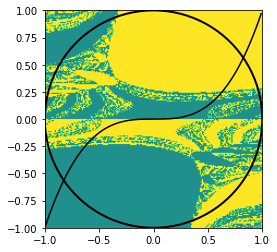

In [10]:
# Dette programmet tar lang tid å kjøre, men gir et ganske artig plott. Hva viser plottet?
delta = 0.01
xx = yy = np.arange(-1.0, 1.0, delta)
Z=np.zeros([xx.size,yy.size])
for kx in range(xx.size):
    for ky in range(yy.size):
        P0=np.array([xx[kx],yy[ky]])
        P, iter = sNewton(f,P0,tol)
        if P[0]<0:
            Z[kx,ky]=0
        else:
            Z[kx,ky]=1

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear',
               origin='lower', extent=[-1, 1, -1, 1],
               vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.plot(np.cos(np.pi*xx),np.sin(np.pi*yy),'k',linewidth=2.0)
plt.plot(xx,xx**3,'k')
plt.show()    
        